In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions

In [2]:
# Helper function
def plot_svm(X, y, clf, title):
    plt.figure(figsize=(6, 4))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(title)
    plt.show()

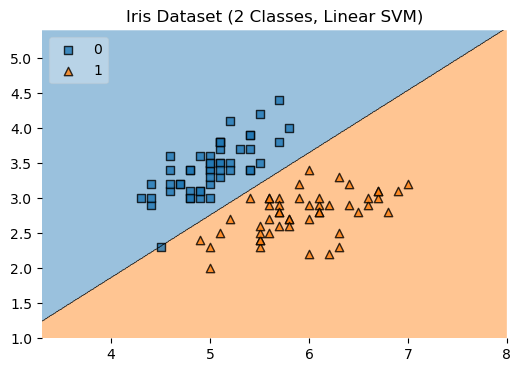

In [3]:
# Iris dataset (2 classes, 2 features)
iris = datasets.load_iris()
X4 = iris.data[iris.target != 2, :2]  # Apenas classes 0 e 1, 2 features
y4 = iris.target[iris.target != 2]
clf4 = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
clf4.fit(X4, y4)
plot_svm(X4, y4, clf4, 'Iris Dataset (2 Classes, Linear SVM)')

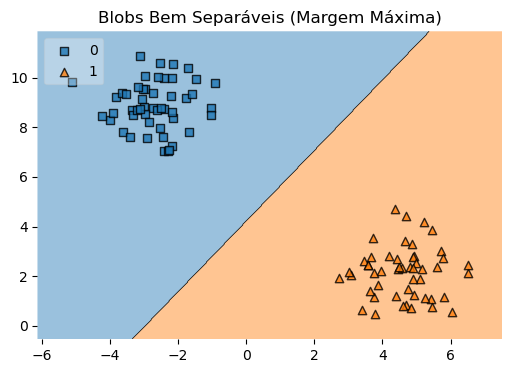

In [4]:
# Blobs bem separáveis
X1, y1 = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)
clf1 = SVC(kernel='linear', C=1.0)
clf1.fit(X1, y1)
plot_svm(X1, y1, clf1, 'Blobs Bem Separáveis (Margem Máxima)')

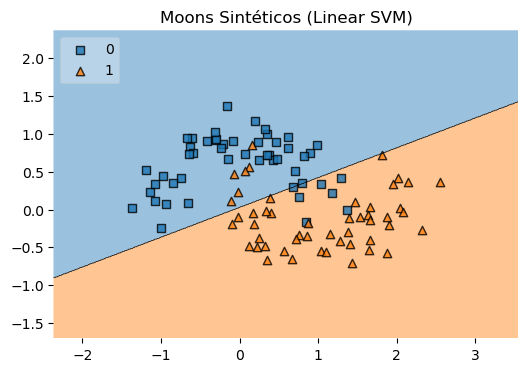

In [6]:
# Moons (mostrando limitação do linear)
X3, y3 = datasets.make_moons(n_samples=100, noise=0.2, random_state=42)
clf3 = SVC(kernel='linear', C=1)
clf3.fit(X3, y3)
plot_svm(X3, y3, clf3, 'Moons Sintéticos (Linear SVM)')

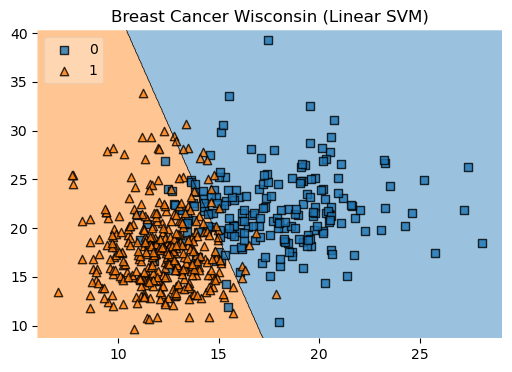

In [7]:
# Breast Cancer Wisconsin (2 features selecionadas)
bc = datasets.load_breast_cancer()
X5 = bc.data[:, :2]  # Usando só duas features para visualização
y5 = bc.target
clf5 = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
clf5.fit(X5, y5)
plot_svm(X5, y5, clf5, 'Breast Cancer Wisconsin (Linear SVM)')

In [18]:
# Função para plotar regiões de decisão
def plot_svm(ax, X, y, C_value, title):
    clf = SVC(kernel='linear', C=C_value)
    clf.fit(X, y)
    
    # Criar grid
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Contorno da margem
    ax.contourf(xx, yy, Z > 0, alpha=0.2, levels=[-1, 0, 1], colors=['blue', 'red'])
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Plotar pontos
    ax.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Classe Azul', edgecolor='k')
    ax.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Classe Vermelha', edgecolor='k')
    ax.set_title(title)

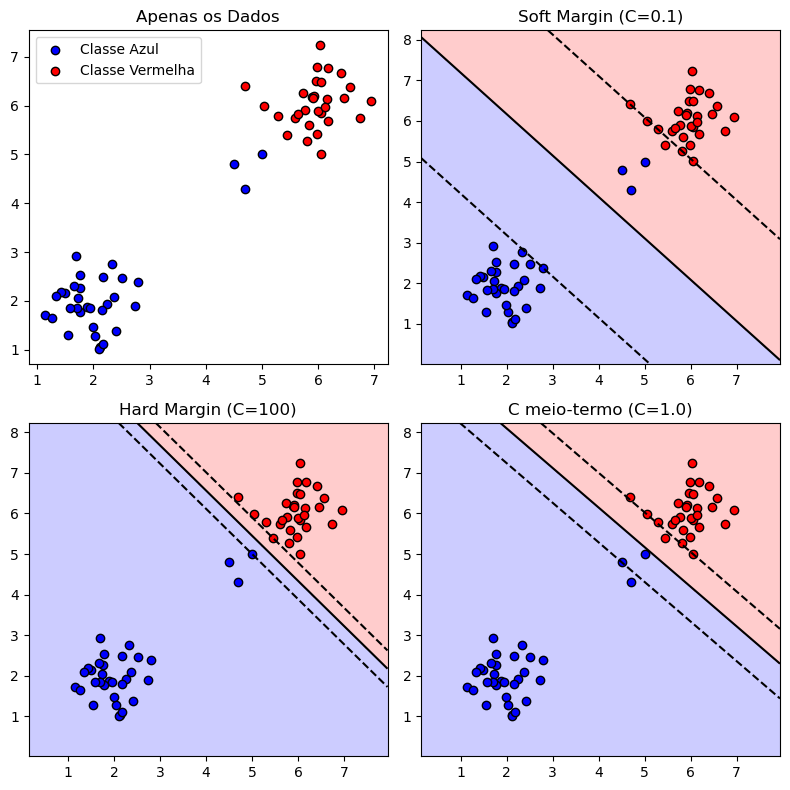

In [27]:
# Gerar dados
np.random.seed(42)
X_blue = np.random.randn(30, 2) * 0.5 + np.array([2, 2])
blue_outliers = np.array([[4.5, 4.8], [4.7, 4.3], [5, 5]])
X_red = np.random.randn(30, 2) * 0.5 + np.array([6, 6])

X = np.vstack([X_blue, blue_outliers, X_red])
y = np.array([0]*33 + [1]*30)


# Visualização
fig, axs = plt.subplots(2, 2, figsize=(8,8))

# Apenas os dados
axs[0, 0].scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolor='k', label='Classe Azul')
axs[0, 0].scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolor='k', label='Classe Vermelha')
axs[0, 0].set_title('Apenas os Dados')
axs[0, 0].legend()

# Soft margin (C pequeno)
plot_svm(axs[0, 1], X, y, C_value=0.1, title='Soft Margin (C=0.1)')

# Hard margin (C grande)
plot_svm(axs[1, 0], X, y, C_value=100, title='Hard Margin (C=100)')

# C meio-termo
plot_svm(axs[1, 1], X, y, C_value=1.0, title='C meio-termo (C=1.0)')

plt.tight_layout()
plt.show()

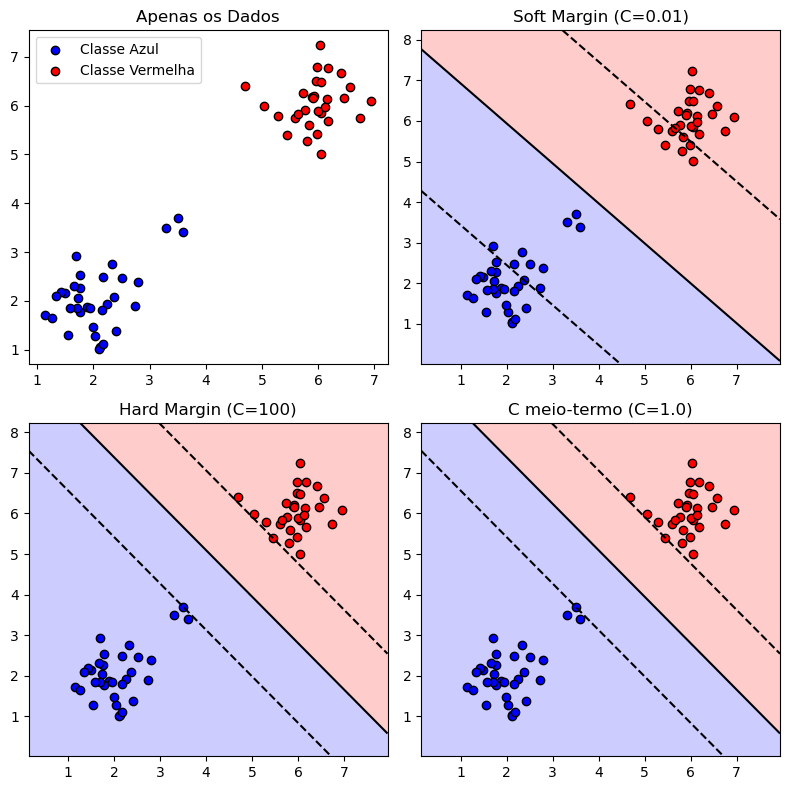

In [28]:
# Seed para reprodutibilidade
np.random.seed(42)

# Primeira nuvem azul
X_blue = np.random.randn(30, 2) * 0.5 + np.array([2, 2])

# Outliers azuis mais suaves (próximos da borda)
blue_outliers = np.array([[3.3, 3.5], [3.6, 3.4], [3.5, 3.7]])

# Nuvem vermelha
X_red = np.random.randn(30, 2) * 0.5 + np.array([6, 6])

# Concatenar
X = np.vstack([X_blue, blue_outliers, X_red])
y = np.array([0]*33 + [1]*30)

# Visualização
fig, axs = plt.subplots(2, 2, figsize=(8,8))

# Apenas os dados
axs[0, 0].scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolor='k', label='Classe Azul')
axs[0, 0].scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolor='k', label='Classe Vermelha')
axs[0, 0].set_title('Apenas os Dados')
axs[0, 0].legend()

# Soft margin (C pequeno)
plot_svm(axs[0, 1], X, y, C_value=0.01, title='Soft Margin (C=0.01)')

# Hard margin (C grande)
plot_svm(axs[1, 0], X, y, C_value=100, title='Hard Margin (C=100)')

# C meio-termo
plot_svm(axs[1, 1], X, y, C_value=1.0, title='C meio-termo (C=1.0)')

plt.tight_layout()
plt.show()